# Instalación

In [12]:
!pip install pytube
!pip install pyktok
!pip install browser_cookie3
!pip install moviepy
!pip install imageio imageio-ffmpeg numpy decorator tqdm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/388.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/388.3 kB ? eta -:--:--
     --- --------------------------------- 41.0/388.3 kB 495.5 kB/s eta 0:00:01
     ------- ----------------------------- 81.9/388.3 kB 770.8 kB/s eta 0:00:01
     ----------- ------------------------ 122.9/388.3 kB 722.1 kB/s eta 0:00:01
     --------------- -------------------- 163.8/388.3 kB 821.4 kB/s eta 0:00:01
     ------------------ ----------------- 194.6/388.3 kB 737.3 kB/s eta 0:00:01
     -------------------- --------------- 225.3/388.3 kB 811.5 kB/s eta 0:00:01
     -------------------- --------------- 225.3/388.3 kB 811.

Defaulting to user installation because normal site-packages is not writeable


# Descarga de vídeos

In [1]:
from pytube import YouTube
import pyktok as pyk
import requests
import os

def descargar_video(url):
    if "youtu" in url:
        print("Es YouTube")
        try:
            video = YouTube(url)
            video.streams.first().download()
            nombre_archivo = video.title + ".mp4"
        except Exception as e:
            print(f"Error al descargar el video de YouTube: {e}")
    elif "tiktok" in url:
        try:
            print("Es TikTok")
            # Descargar un video de TikTok y su metadato
            pyk.save_tiktok(enlace, True, 'video_data.csv', 'chrome')
            nombre_archivo = "video_tiktok.mp4"
        except Exception as e:
            print(f"Error al descargar el video de TikTok: {e}")
    else:
        print("Enlace no reconocido")

# Ejemplo de uso
enlaces = ['https://vm.tiktok.com/ZGefVUwVU/',"https://youtu.be/Cnm1cMqePSU?si=dZSaJ3gAyB3tLqex", "https://x.com/AMflashbacks/status/1767754617851695504?s=20"]

for enlace in enlaces:
    descargar_video(enlace)


We strongly recommend you run 'specify_browser' first, which will allow you to run pyktok's functions without using the browser_name parameter every time. 'specify_browser' takes as its sole argument a string representing a browser installed on your system, e.g. "chrome," "firefox," "edge," etc.
Es TikTok
Saved video
 https://v16-webapp-prime.tiktok.com/video/tos/useast2a/tos-useast2a-ve-0068c001-euttp/o0HTPlHIjIYApeNfwXQgk2DLHfaFEGfwEgY0Dx/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=tiktok_m&cd=0%7C0%7C1%7C&cv=1&br=2198&bt=1099&cs=0&ds=3&ft=4fUEKMUm8Zmo0g6xJ-4jVSL7rpWrKsd.&mime_type=video_mp4&qs=0&rc=NWdoNDw3Z2lpOmc0NWU8ZEBpajpmN3I5cjpycTMzZjczM0AvYjAuLmIyNi0xLzQ0Yl4yYSNqZ2czMmRzYWVgLS1kMWNzcw%3D%3D&btag=e00090000&expire=1717163102&l=20240531074243337078FAD04A1B1B4BB5&ply_type=2&policy=2&signature=1b681d22e44333c40a4e2d781e45161a&tk=tt_chain_token 
to
 C:\Users\Ángel\Documents\AcordesInteligentes
Saved metadata for video
 https://vm.tiktok.com/ZGefVUwVU/ 
to
 C:\Users\Ángel\Documents\A

# Transformación de los Mp4 a wav

In [2]:
import os
from moviepy.editor import VideoFileClip
import time

def mp4_to_wav(input_file, output_file):
    video = VideoFileClip(input_file)
    audio = video.audio
    audio.write_audiofile(output_file)
    # Cerrar el archivo de video para liberar el recurso
    video.close()
    # Esperar un breve período antes de intentar eliminar el archivo MP4
    time.sleep(1)  # Espera 1 segundo (puedes ajustar este valor según sea necesario)
    try:
        os.remove(input_file)
    except PermissionError:
        print(f"No se pudo eliminar {input_file} porque aún está siendo utilizado por otro proceso.")

# Verificar y crear el directorio de salida si no existe
output_dir = "audio"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Convertir archivos MP4 a WAV
for filename in os.listdir():
    if filename.endswith(".mp4"):
        input_file = filename
        output_file = os.path.join(output_dir, os.path.splitext(filename)[0] + ".wav")
        mp4_to_wav(input_file, output_file)


MoviePy - Writing audio in audio\buttercup - jack stauber (cover).wav


MoviePy - Done.
MoviePy - Writing audio in audio\ZGefVUwVU_.wav


MoviePy - Done.


# Sacar la letra

In [28]:
!pip install --upgrade git+https://github.com/huggingface/transformers.git accelerate datasets[audio]


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/huggingface/transformers.git to c:\users\ángel\appdata\local\temp\pip-req-build-8dpi9tt5
  Resolved https://github.com/huggingface/transformers.git to commit 484e10f7f26b62452ba96488811a0c3f6eaf58df
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git 'C:\Users\Ángel\AppData\Local\Temp\pip-req-build-8dpi9tt5'


In [1]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from datasets import load_dataset


device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-large-v3"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    max_new_tokens=128,
    chunk_length_s=30,
    batch_size=16,
    return_timestamps=True,
    torch_dtype=torch_dtype,
    device=device,
)

dataset = load_dataset("distil-whisper/librispeech_long", "clean", split="validation")
sample = dataset[0]["audio"]

result = pipe("audio/ZGefVUwVU_.wav")
print(result["text"])



ModuleNotFoundError: No module named 'multiprocess'

# Aislar el audio de instrumentos

In [1]:
!pip install -U demucs
# or for local development, if you have a clone of Demucs
# pip install -e .


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.2 MB 495.5 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.2 MB 762.6 kB/s eta 0:00:02
     ---- ----------------------------------- 0.1/1.2 MB 798.9 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.2 MB 876.1 kB/s eta 0:00:02
     ------- -------------------------------- 0.2/1.2 MB 919.0 kB/s eta 0:00:02
     --------- ------------------------------ 0.3/1.2 MB 947.5 kB/s eta 0:00:01
     ---------- ----------------------------- 0.3/1.2 MB 967.8 kB/s eta 0:00:01
     ------------ --------------------------- 0.4/1.2 MB 955.7 kB/s eta 0:00:01
     ------------- -------------------------- 0.4/1.2 MB 937.3 kB/s eta 0:00:01
     ---------------- ----------------------- 0.5/1.2 MB 994

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import torch
import torchaudio
from demucs.apply import apply_model

# Cargar el archivo .wav
waveform, sample_rate = torchaudio.load("audio/ZGefVUwVU_.wav")

# Asegurarse de que el archivo tenga el formato correcto (2 canales y frecuencia de muestreo de 44100 Hz)
if waveform.shape[0] != 2 or sample_rate != 44100:
    raise ValueError("El archivo WAV debe tener 2 canales y una frecuencia de muestreo de 44100 Hz.")

# Normalizar la forma de onda si es necesario
waveform = waveform / torch.max(torch.abs(waveform))

# Convertir la forma de onda en tensores de PyTorch
x = waveform.unsqueeze(0)  # Agregar una dimensión para el lote

# Cargar el modelo DEMUCS pre-entrenado
from demucs import pretrained
model = pretrained.get_model('mdx')

# Aplicar el modelo al archivo de audio
out = apply_model(model, x)[0]  # El resultado tiene forma [S, C, T], donde S es el número de fuentes

# Sumar las fuentes, ignorando "vocals" si está presente
output_waveform = torch.zeros_like(waveform)
for i, source in enumerate(out):
    if model.sources[i] != "vocals":
        output_waveform += source

# Guardar el audio resultante sin la voz humana
torchaudio.save("output_without_vocals.wav", output_waveform, sample_rate)


# Pasar a espectrograma

In [ ]:
!pip install librosa

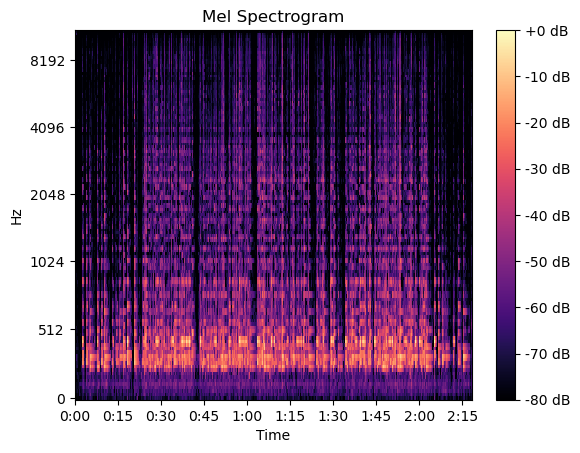

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np 

# Cargar el archivo de audio
audio_file = "output_without_vocals.wav"
y, sr = librosa.load(audio_file)

# Calcular el espectrograma
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Visualizar el espectrograma
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.savefig('spectrogram.png', format='png')
plt.show()
